In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 입력합니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

c:\ProgramData\anaconda3\envs\mldltest2\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# 모델 저장의 조건을 설정합니다.
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                    validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.7577.keras

Epoch 2: saving model to ./data/model/all/02-0.7577.keras

Epoch 3: saving model to ./data/model/all/03-0.7577.keras

Epoch 4: saving model to ./data/model/all/04-0.7600.keras

Epoch 5: saving model to ./data/model/all/05-0.7608.keras

Epoch 6: saving model to ./data/model/all/06-0.7746.keras

Epoch 7: saving model to ./data/model/all/07-0.7931.keras

Epoch 8: saving model to ./data/model/all/08-0.8231.keras

Epoch 9: saving model to ./data/model/all/09-0.8423.keras

Epoch 10: saving model to ./data/model/all/10-0.8677.keras

Epoch 11: saving model to ./data/model/all/11-0.8854.keras

Epoch 12: saving model to ./data/model/all/12-0.8938.keras

Epoch 13: saving model to ./data/model/all/13-0.9023.keras

Epoch 14: saving model to ./data/model/all/14-0.9015.keras

Epoch 15: saving model to ./data/model/all/15-0.9046.keras

Epoch 16: saving model to ./data/model/all/16-0.9069.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [8]:
help(plt.ylim)

Help on function ylim in module matplotlib.pyplot:

ylim(*args, **kwargs) -> 'tuple[float, float]'
    Get or set the y-limits of the current Axes.
    
    Call signatures::
    
        bottom, top = ylim()  # return the current ylim
        ylim((bottom, top))   # set the ylim to bottom, top
        ylim(bottom, top)     # set the ylim to bottom, top
    
    If you do not specify args, you can alternatively pass *bottom* or
    *top* as kwargs, i.e.::
    
        ylim(top=3)  # adjust the top leaving bottom unchanged
        ylim(bottom=1)  # adjust the bottom leaving top unchanged
    
    Setting limits turns autoscaling off for the y-axis.
    
    Returns
    -------
    bottom, top
        A tuple of the new y-axis limits.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``ylim()``) is the pyplot
    equivalent of calling `~.Axes.get_ylim` on the current Axes.
    Calling this function with arguments is the pyplot equivalent of calling
    `~.Axes.se

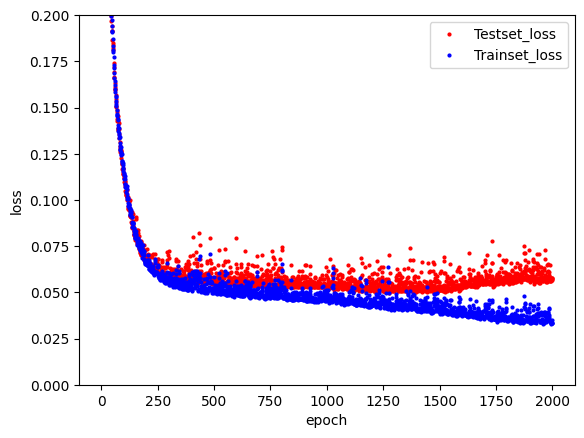

In [10]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df = pd.DataFrame(history.history)
hist_df
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss = hist_df['val_loss']
# y_loss에 학습셋의 오차를 저장합니다.
y_loss = hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0, 0.2)
plt.show()